# linear_mplex_test.ipynb

Notebook for a basic test of the `linear_mplex` units.

In [1]:
%cd ../..
from draculab import *
import numpy as np
import matplotlib.pyplot as plt

/home/z/projects/draculab/notebook


In [2]:
# parameters

net_params = {'min_delay' : 0.005,
              'min_buff_size' : 10 }

MPLEX_params = {'type' : unit_types.linear_mplex,
                'init_val' : 0.,
                'tau' : 0.01 }

SRC_params = {'type' : unit_types.source,
              'init_val' : 0.,
              'function' : lambda t: None }

SWITCH_params = {'type' : unit_types.source,
                 'init_val' : 0.,
                 'function' : lambda t: 0. if t < 5. else 1. }

SRC__MPLEX_conn = {'rule' : 'all_to_all',
                   'delay' : 0.01 }
SRC__MPLEX_syn = {'type' : synapse_types.static,
                  'inp_ports' : [0, 1],
                  'init_w' : [1., -1.] } # different weights!!!

SWITCH__MPLEX_conn = {'rule': 'all_to_all',
                      'delay': 0.01 }
SWITCH__MPLEX_syn = {'type' : synapse_types.static,
                     'inp_ports' : 2,
                     'init_w' : 1. }

In [3]:
# create units
net = network(net_params)
MPLEX = net.create(1, MPLEX_params)
SRC = net.create(2, SRC_params)
SWITCH = net.create(1, SWITCH_params)

# define input functions
net.units[SRC[0]].set_function(lambda t: np.sin(t))
net.units[SRC[1]].set_function(lambda t: np.cos(t))

# create connections
net.connect(SRC, MPLEX, SRC__MPLEX_conn, SRC__MPLEX_syn)
net.connect(SWITCH, MPLEX, SWITCH__MPLEX_conn, SWITCH__MPLEX_syn)

In [4]:
# run
times, data, _ = net.run(10.)
data = np.array(data)

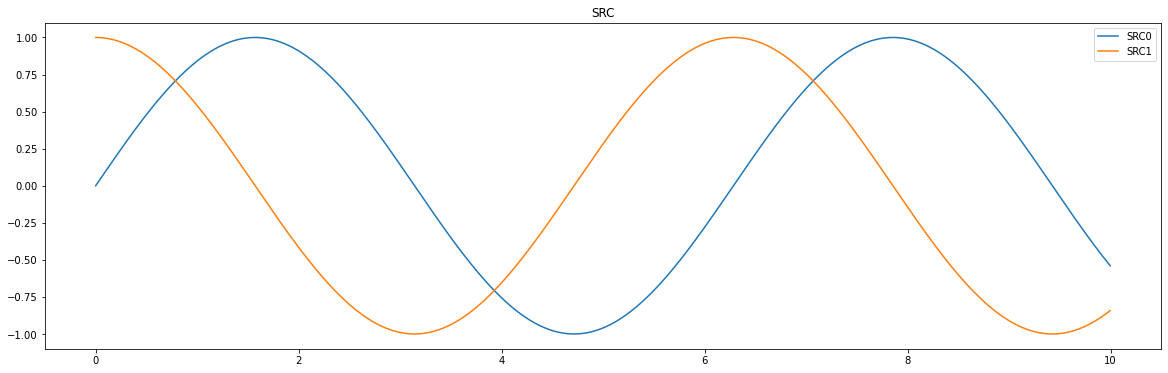

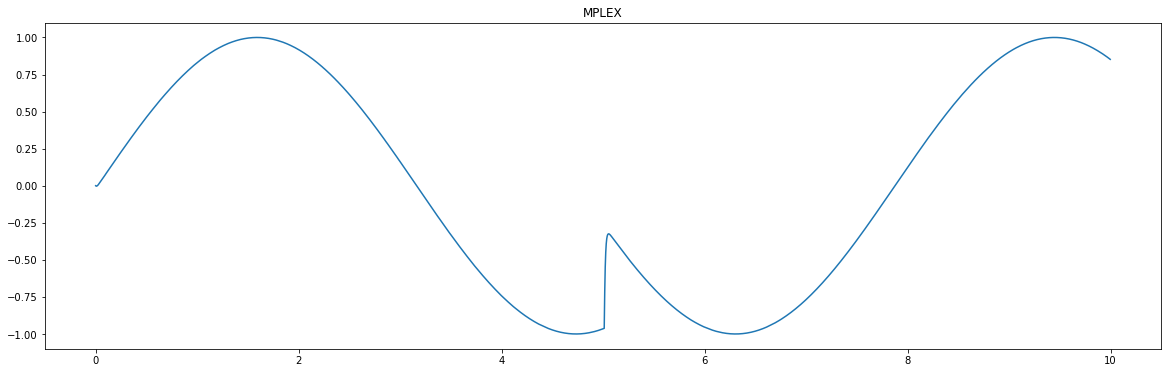

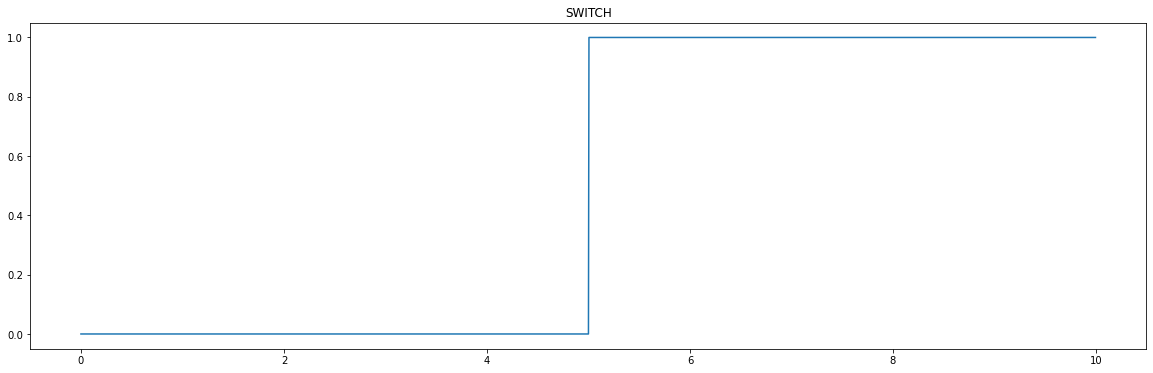

In [6]:
# visualize

fs = (20,6)
SRC_fig = plt.figure(figsize=fs)
SRC_data = np.array(data[SRC])
plt.plot(times, SRC_data.transpose())
plt.legend(['SRC0', 'SRC1'])
plt.title('SRC')


MPLEX_fig = plt.figure(figsize=fs)
MPLEX_data = np.array(data[MPLEX])
plt.plot(times, MPLEX_data.transpose())
plt.title('MPLEX')

SWITCH_fig = plt.figure(figsize=fs)
SWITCH_data = np.array(data[SWITCH])
plt.plot(times, SWITCH_data.transpose())
plt.title('SWITCH')

plt.show()